In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_csv("KS_train_final.csv")

In [3]:
X = df.drop('funded', axis=1)
y = df['funded']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)

C:\Users\kplag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
rfc_predict = rfc.predict(X_test)

In [7]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [8]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 8062  2251]
 [ 2613 10983]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77     10313
         1.0       0.83      0.81      0.82     13596

    accuracy                           0.80     23909
   macro avg       0.79      0.79      0.79     23909
weighted avg       0.80      0.80      0.80     23909



=== All AUC Scores ===
[0.74860526 0.87342796 0.81166649 0.84023476 0.90039796 0.80581915
 0.83302414 0.80988359 0.74572796 0.81040083]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8179188106677676


In [9]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', random_state = 42)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 7550  2763]
 [ 1948 11648]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     10313
         1.0       0.81      0.86      0.83     13596

    accuracy                           0.80     23909
   macro avg       0.80      0.79      0.80     23909
weighted avg       0.80      0.80      0.80     23909



=== All AUC Scores ===
[0.7781853  0.88490711 0.83166819 0.87871463 0.9431744  0.88397739
 0.85292451 0.83801396 0.85582116 0.8519691 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.859935574600836


In [10]:
metrics.accuracy_score(y_test, rfc_predict)

0.80296122798946

In [11]:
metrics.accuracy_score(y_train, rfc.predict(X_train))

0.8114604391774137

In [14]:
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [17]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot',
feature_names = X.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

In [20]:
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: blurb_bayes          Importance: 0.59
Variable: staff_pick           Importance: 0.08
Variable: log_goal_usd         Importance: 0.08
Variable: log_days_to_launch   Importance: 0.04
Variable: is_2013              Importance: 0.03
Variable: is_2012              Importance: 0.02
Variable: is_2014              Importance: 0.02
Variable: is_2015              Importance: 0.02
Variable: log_days_to_dealine  Importance: 0.02
Variable: is_cat_art           Importance: 0.01
Variable: is_cat_technology    Importance: 0.01
Variable: is_cat_food          Importance: 0.01
Variable: is_2010              Importance: 0.01
Variable: is_2011              Importance: 0.01
Variable: is_2016              Importance: 0.01
Variable: is_cat_music         Importance: 0.0
Variable: is_cat_film          Importance: 0.0
Variable: is_cat_publishing    Importance: 0.0
Variable: is_cat_games         Importance: 0.0
Variable: is_cat_fashion       Importance: 0.0
Variable: is_cat_comics        Importance: 0.

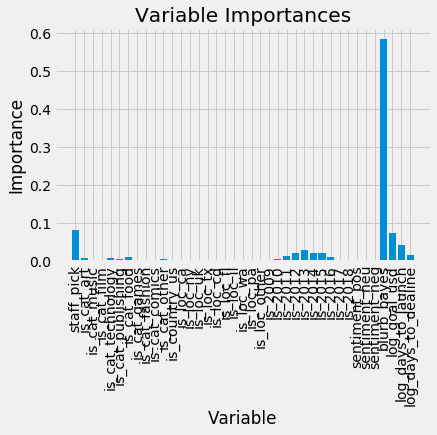

In [25]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, X.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');